In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = "Arial"
import numpy as np
import matplotlib.pyplot as plt
from facilities import store_object, retrieve_object
from dPCA import dPCA
import pdb
import os



Bad key "legend.title_fontsize" on line 22 in
/Users/michael/.matplotlib/stylelib/notebook.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
dirpath = '/Users/michael/Documents/GitHub/multi-area-cleaned/'
loadpath_data = dirpath + 'sims/revision/exemplar_new/scratch_data/'
savepath_figs = dirpath + 'sims/revision/exemplar_new/figs/'
savepath = dirpath + 'sims/revision/exemplar_new/scratch_data/'
modelpath = dirpath + 'examples/models/cb_analyze_fixed-cb.py'

In [3]:
import sys
import subprocess
import numpy as np
import os
import cPickle as pkl
import matplotlib.pyplot as plt
import pdb
from pycog.trialRNN import PSTH
# clear output
from IPython.display import clear_output
clear_output()

## Plots / Outputs

In [4]:
def print_data(logged_data):
    for k in sorted(logged_data.iterkeys()):
        mean_data = np.mean(logged_data[k])
        std_data = np.std(logged_data[k])
        print ('{}: mean {:.2f}, std {:.2f}'.format(k, mean_data, std_data))


In [5]:
# noise_scale = 0.2
for noise_scale in [0.1, 0.2, 0.3, 0.5, 1]: #, 0.3, 0.5, 1]: # 0.1 0.2 0.3
    nt = 20
    n_monte = 10
#     fname_log = 'logs/computational_advantage_noise{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    fname_log = 'logs/computational_advantage_relativeNoise{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    fname = dirpath + fname_log
    logged_data = np.load(fname)
    print('#############################################################################')
    print('### filename is: {} '.format(fname_log))
    print_data(logged_data)

#############################################################################
### filename is: logs/computational_advantage_relativeNoise0.1_nt20_nmonte10.npz 
dale_no_perturb_perf: mean 97.50, std 1.26
dale_perturb_perf: mean 97.44, std 1.37
ffi_no_perturb_perf: mean 96.74, std 1.38
ffi_perturb_perf: mean 96.67, std 1.42
nodale_no_perturb_perf: mean 98.59, std 0.53
nodale_perturb_perf: mean 98.56, std 0.51
#############################################################################
### filename is: logs/computational_advantage_relativeNoise0.2_nt20_nmonte10.npz 
dale_no_perturb_perf: mean 97.50, std 1.26
dale_perturb_perf: mean 97.27, std 1.38
ffi_no_perturb_perf: mean 96.74, std 1.38
ffi_perturb_perf: mean 96.49, std 1.64
nodale_no_perturb_perf: mean 98.59, std 0.53
nodale_perturb_perf: mean 98.16, std 1.93
#############################################################################
### filename is: logs/computational_advantage_relativeNoise0.3_nt20_nmonte10.npz 
dale_no_perturb_pe

### Generate plots

In [6]:
def get_mean_std_monte(data, nmonte=1):
    # data has shape (80,) each 10 correspond to one monte 
    new_data = [data[n:n+nmonte] for n in range(len(data) // nmonte)]
    return new_data

In [7]:
def append_data(logged_data):
    temp_result_list = {}
    std_result_list = {}
    for k in sorted(logged_data.iterkeys()):
        mc_mean_data = get_mean_std_monte(logged_data[k]) # Averaging across MC noise
        mean_data_seeds = np.mean(mc_mean_data)
        temp_result_list[k] = mean_data_seeds
        std_result_list[k] = np.std(mc_mean_data) / np.sqrt(len(mc_mean_data))

    return temp_result_list, std_result_list

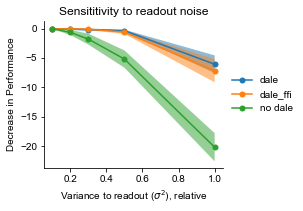

In [16]:
# noise_scale = 0.2
results_list = {}
std_results_list = {}
for noise_scale in [0.1, 0.2, 0.3, 0.5, 1]: #, 1]: #, 0.3, 0.5, 1]: # 0.1 0.2 0.3
    nt = 20
    n_monte = 10
#     fname_log = 'logs/computational_advantage_relativeNoise{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    fname_log = 'logs/computational_advantage_relativeNoiseNonzero{}_nt{}_nmonte{}.npz'.format(noise_scale, nt, n_monte)
    fname = dirpath + fname_log
    logged_data = np.load(fname)
    mean_list, std_list = append_data(logged_data)
    results_list[noise_scale] = mean_list
    std_results_list[noise_scale] = std_list

results_perturb = [] # np.zeros((5, 6))
results_no_perturb = []
std_perturb = []
conds_perturbed = ['dale_perturb_perf', 'ffi_perturb_perf', 'nodale_perturb_perf']
conds_no_perturbed = ['dale_no_perturb_perf', 'ffi_no_perturb_perf', 'nodale_no_perturb_perf']

for noise in (sorted(results_list)):
    results_new_temp = [results_list[noise][cond] for cond in conds_no_perturbed]
    results_no_perturb.append(results_new_temp)
    
for noise in (sorted(results_list)):
    results_new_temp = [results_list[noise][cond] for cond in conds_perturbed]
    results_perturb.append(results_new_temp)
    std_temp = [std_results_list[noise][cond] for cond in conds_perturbed]
    std_perturb.append(std_temp)

# Make plot
plt.figure(figsize=(3.2,2.7))
ax = plt.gca()
results_new = np.array(results_perturb) - np.array(results_no_perturb)
yerr = np.array(std_perturb)
labels = ['dale', 'dale_ffi', 'no dale']
for j, label in enumerate(labels):
    plt.plot(sorted(results_list), results_new[:, j], marker='o', markersize=5, label=label)
    plt.fill_between(sorted(results_list), results_new[:, j] - yerr[:, j],
                     results_new[:, j] + yerr[:, j], alpha = 0.5)
plt.xlabel('Variance to readout ($\sigma^2$), relative')
plt.ylabel('Decrease in Performance')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.title('Sensititivity to readout noise')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/comp_advanatge_nonzeroNoiseRelative.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight')    

# print(results_list)
# print(std_list)

## Plots for output weights (also in revision_main)

In [5]:
loadpath_output = dirpath + "sims/revision/scratch_data_output/"

Overlap metric:
0.7764308771869783


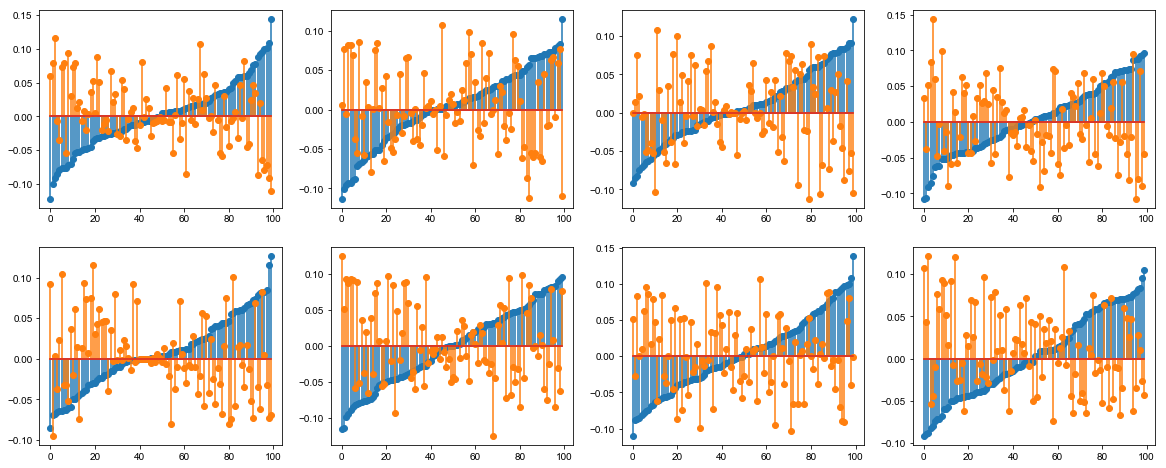

In [37]:
# nodale
basepath = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_seed='
fig, axs = plt.subplots(2,4, figsize = (20,8))
axs = axs.ravel()
sum_overlap = 0
sum_left = 0
for i in range(8):
    rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
    axs[i].stem(np.sort(rnn.Wout[0, 200:300]), 'C0')
    id_sort = np.argsort(rnn.Wout[0, 200:300])
    axs[i].stem(rnn.Wout[1, 200:300][id_sort], 'C1-', markerfmt='C1o')
    sum_overlap = sum_overlap + np.abs(rnn.Wout[0, :]).dot(np.abs(rnn.Wout[1, :]))
    sum_left = sum_left + np.sum(rnn.Wout[0, :] ** 2)
    
print('Overlap metric:')
print(sum_overlap/sum_left)

Overlap metric:
0.0027019680693676773


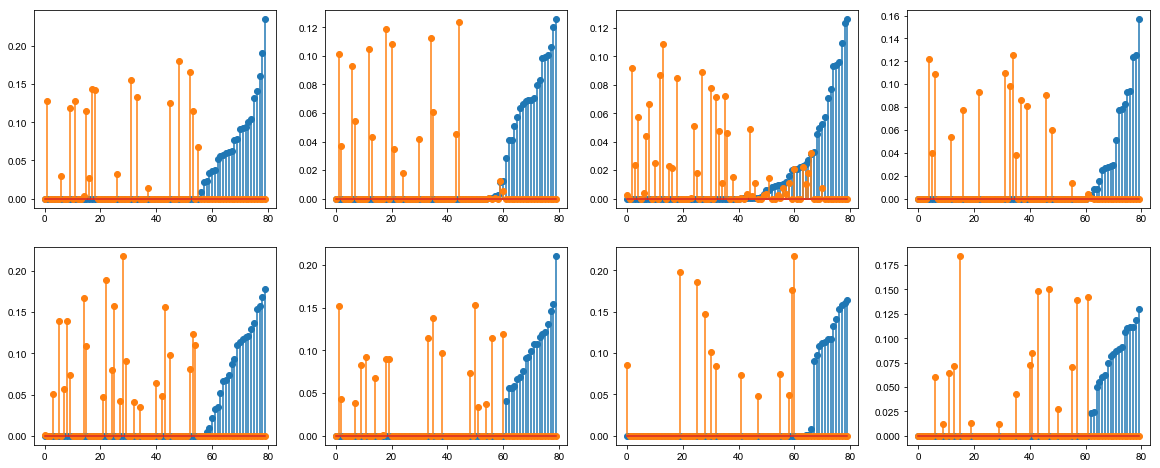

In [42]:
# Dale law - 3area RNN

basepath = '2020-04-10_cb_simple_3areas_seed='
fig, axs = plt.subplots(2,4, figsize = (20,8))
axs = axs.ravel()
sum_overlap = 0
sum_left = 0
for i in range(8):
    rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
    axs[i].stem(np.sort(rnn.Wout[0, 160:240]), 'C0')
    id_sort = np.argsort(rnn.Wout[0, 160:240])
    axs[i].stem(rnn.Wout[1, 160:240][id_sort], 'C1-', markerfmt='C1o')
    sum_overlap = sum_overlap + np.abs(rnn.Wout[0, :]).dot(np.abs(rnn.Wout[1, :]))
    sum_left = sum_left + np.sum(rnn.Wout[0, :] ** 2)
    
print('Overlap metric:')
print(sum_overlap/sum_left)

Overlap metric:
0.29466659038751203


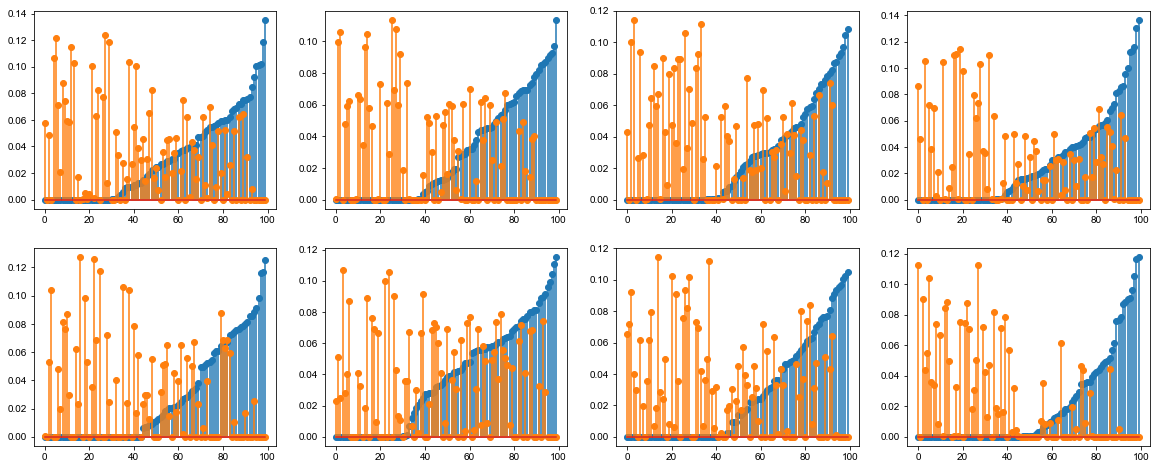

In [34]:
# nodale, with constrain on output weights
basepath = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_outputpos_seed='
fig, axs = plt.subplots(2,4, figsize = (20,8))
axs = axs.ravel()
sum_overlap = 0
sum_left = 0
for i in range(8):
    rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
    axs[i].stem(np.sort(rnn.Wout[0, 200:300]), 'C0')
    id_sort = np.argsort(rnn.Wout[0, 200:300])
    axs[i].stem(rnn.Wout[1, 200:300][id_sort], 'C1-', markerfmt='C1o')
    sum_overlap = sum_overlap + np.abs(rnn.Wout[0, :]).dot(np.abs(rnn.Wout[1, :]))
    sum_left = sum_left + np.sum(rnn.Wout[0, :] ** 2)
    
print('Overlap metric:')
print(sum_overlap/sum_left)

Overlap metric:
0.003987508657529356


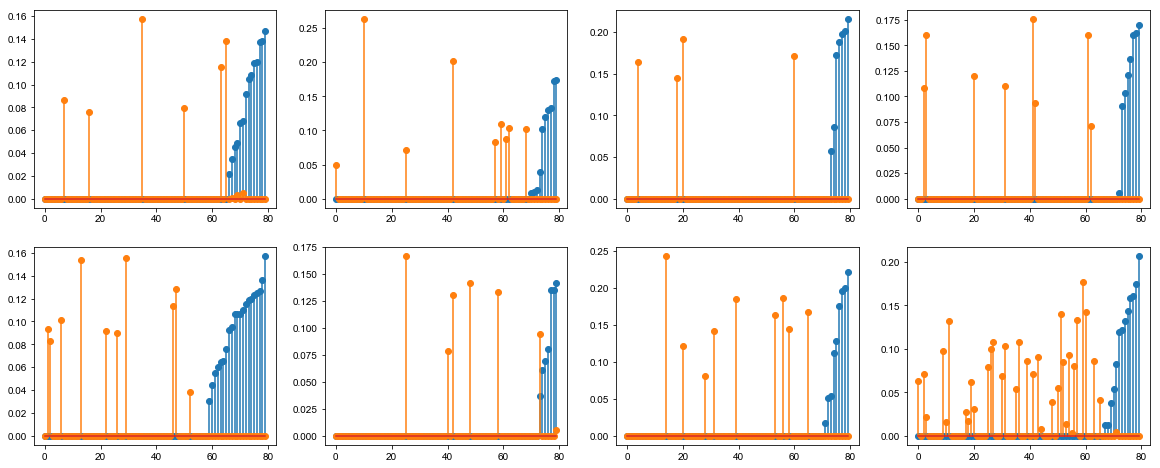

In [8]:
# dale FFI 0.1, with constrain on output weights
basepath = '2020-04-10_cb_simple_3areas_correctdale_ffi=0p1_seed='
fig, axs = plt.subplots(2,4, figsize = (20,8))
axs = axs.ravel()
sum_overlap = 0
sum_left = 0
for i in range(8):
    rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
    axs[i].stem(np.sort(rnn.Wout[0, 160:240]), 'C0')
    id_sort = np.argsort(rnn.Wout[0, 160:240])
    axs[i].stem(rnn.Wout[1, 160:240][id_sort], 'C1-', markerfmt='C1o')
    sum_overlap = sum_overlap + np.abs(rnn.Wout[0, :]).dot(np.abs(rnn.Wout[1, :]))
    sum_left = sum_left + np.sum(rnn.Wout[0, :] ** 2)
    
print('Overlap metric:')
print(sum_overlap/sum_left)

In [82]:
# print(rnn.Win)
# print(rnn.Wrec)
# print(rnn.Wout)

### One final plot (paper)

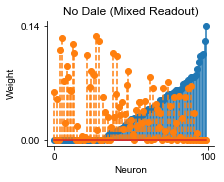

In [85]:
from matplotlib.ticker import FormatStrFormatter

basepath = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_outputpos_seed='
i = 0
seed = i
rnn = retrieve_object(basepath + str(seed) + '_rnn.p', loadpath_output)
plt.figure(figsize=(3,2.3))
rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
plt.stem(np.sort(rnn.Wout[0, 200:300]), 'C0')
id_sort = np.argsort(rnn.Wout[0, 200:300])
plt.stem(rnn.Wout[1, 200:300][id_sort], 'C1--', markerfmt='C1o')
plt.xticks([0, 100])
plt.xlabel('Neuron')
plt.ylabel('Weight')
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.yticks([0, np.max(rnn.Wout)])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('No Dale (Mixed Readout)')

savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/weights_nodale_outpos.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight') 

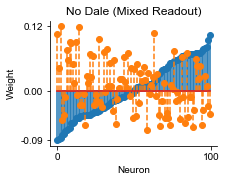

In [86]:
from matplotlib.ticker import FormatStrFormatter

basepath = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_seed='
i = 7
seed = i
rnn = retrieve_object(basepath + str(seed) + '_rnn.p', loadpath_output)
plt.figure(figsize=(3,2.3))
rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
plt.stem(np.sort(rnn.Wout[0, 200:300]), 'C0')
id_sort = np.argsort(rnn.Wout[0, 200:300])
plt.stem(rnn.Wout[1, 200:300][id_sort], 'C1--', markerfmt='C1o')
plt.xticks([0, 100])
plt.xlabel('Neuron')
plt.ylabel('Weight')
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.yticks([np.min(rnn.Wout) ,0, np.max(rnn.Wout)])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('No Dale (Mixed Readout)')

savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/weights_nodale.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight') 

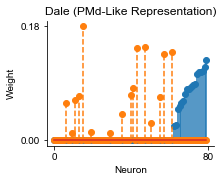

In [87]:
from matplotlib.ticker import FormatStrFormatter

basepath = '2020-04-10_cb_simple_3areas_seed='
i = 7
seed = i
rnn = retrieve_object(basepath + str(seed) + '_rnn.p', loadpath_output)
plt.figure(figsize=(3,2.3))
rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
plt.stem(np.sort(rnn.Wout[0, 160:240]), 'C0')
id_sort = np.argsort(rnn.Wout[0, 160:240])
plt.stem(rnn.Wout[1, 160:240][id_sort], 'C1--', markerfmt='C1o')
plt.xticks([0, 80])
plt.xlabel('Neuron')
plt.ylabel('Weight')
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.yticks([0, np.max(rnn.Wout)])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Dale (PMd-Like Representation)')

savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/weights_dale.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight') 

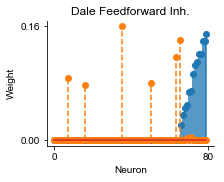

In [12]:
from matplotlib.ticker import FormatStrFormatter

basepath = '2020-04-10_cb_simple_3areas_correctdale_ffi=0p1_seed='
i = 0
seed = i
rnn = retrieve_object(basepath + str(seed) + '_rnn.p', loadpath_output)
plt.figure(figsize=(3,2.3))
rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
plt.stem(np.sort(rnn.Wout[0, 160:240]), 'C0')
id_sort = np.argsort(rnn.Wout[0, 160:240])
plt.stem(rnn.Wout[1, 160:240][id_sort], 'C1--', markerfmt='C1o')
plt.xticks([0, 80])
plt.xlabel('Neuron')
plt.ylabel('Weight')
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.yticks([0, np.max(rnn.Wout)])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Dale Feedforward Inh.')

savepath = '/Users/michael/Documents/GitHub/multi-area-cleaned/paper/figures_rough/weights_dale_ffi.pdf'
plt.savefig(savepath, format='pdf', dpi=None, bbox_inches='tight') 

## New perturbation to output weights (Development)

In [97]:
noise_scale = 0.1

In [98]:
vin = 0.10**2
var_in = np.array(((0, 0, 0, 0), (0,0,0,0), (0,0,vin,0), (0,0,0,vin)))#0.20**2
var_rec = 0.05**2
nt = 2
seed = 7

### Dale

In [99]:
rnnbase = dirpath + 'saved_rnns_server_apr/data/2020-04-10_cb_simple_3areas/'
filename_pkl = '2020-04-10_cb_simple_3areas_seed={}.pkl'.format(seed)
np.random.seed(seed=seed)
psth_dale = PSTH(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, seed=1, threshold=0.6)
Wout_temp = np.copy(psth_dale.rnn.Wout[:, 160:240])
Wout_temp = Wout_temp + np.random.normal(size=Wout_temp.shape) * noise_scale
Wout = np.zeros_like(psth_dale.rnn.Wout)
Wout[:, 160:240] = Wout_temp
psth_dale_new = PSTH(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, seed=1, threshold=0.6, Wout=Wout)

[ pycog.rnn.RNN ] 16500 updates, best error = 0.20798652, spectral radius = 1.84214282
 Trial 56/56: left_right: 1, cond: 180
The proportion of NaN RTs is 0.0
[ pycog.rnn.RNN ] 16500 updates, best error = 0.20798652, spectral radius = 1.84214282
 Trial 56/56: left_right: 1, cond: 180
The proportion of NaN RTs is 0.0357142857143


In [100]:
print("Accuracy Before Perturbation: {:.2f}".format(psth_dale.eval_performance()))
print("Accuracy After Perturbation: {:.2f}".format(psth_dale_new.eval_performance()))

Accuracy Before Perturbation: 100.00
Accuracy After Perturbation: 96.43


In [108]:
Wout_temp = np.copy(psth_dale.rnn.Wout[:, 160:240])
print(np.mean(Wout_temp))
print(np.max(Wout_temp))

0.017301943
0.1842219


### NoDale

In [90]:
rnnbase = dirpath + 'saved_rnns_server_apr/data/2020-04-10_cb_simple_3areas_nodale_ff=0p1/'
filename_pkl = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_seed={}.pkl'.format(seed)
np.random.seed(seed=seed)
psth_nodale = PSTH(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, seed=1, threshold=0.6)
Wout_temp = np.copy(psth_nodale.rnn.Wout[:, 200:300])
Wout_temp = Wout_temp + np.random.normal(size=Wout_temp.shape) * noise_scale
Wout = np.zeros_like(psth_nodale.rnn.Wout)
Wout[:, 200:300] = Wout_temp
psth_nodale_new = PSTH(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, seed=1, threshold=0.6, Wout=Wout)


[ pycog.rnn.RNN ] 4500 updates, best error = 0.20724680, spectral radius = 1.28292620
 Trial 56/56: left_right: 1, cond: 180
The proportion of NaN RTs is 0.0
[ pycog.rnn.RNN ] 4500 updates, best error = 0.20724680, spectral radius = 1.28292620
 Trial 56/56: left_right: 1, cond: 180
The proportion of NaN RTs is 0.178571428571


In [91]:
print("Accuracy Before Perturbation: {:.2f}".format(psth_nodale.eval_performance()))
print("Accuracy After Perturbation: {:.2f}".format(psth_nodale_new.eval_performance()))

Accuracy Before Perturbation: 100.00
Accuracy After Perturbation: 92.86


In [106]:
Wout_temp = np.copy(psth_nodale.rnn.Wout[:, 160:240])
print(np.max(Wout_temp))

0.119549796


### Feedforward Inhibition

In [92]:
rnnbase = dirpath + 'saved_rnns_server_apr/data/2020-04-10_cb_simple_3areas_correctdale_ffi=0p1/'
filename_pkl = '2020-04-10_cb_simple_3areas_correctdale_ffi=0p1_seed={}.pkl'.format(seed)
np.random.seed(seed=seed)
psth_ffi = PSTH(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, seed=1, threshold=0.6)
Wout_temp = np.copy(psth_ffi.rnn.Wout[:, 160:240])
Wout_temp = Wout_temp + np.random.normal(size=Wout_temp.shape) * noise_scale
Wout = np.zeros_like(psth_ffi.rnn.Wout)
Wout[:, 160:240] = Wout_temp
psth_ffi_new = PSTH(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=nt, seed=1, threshold=0.6, Wout=Wout)

[ pycog.rnn.RNN ] 19500 updates, best error = 0.20082369, spectral radius = 1.42005074
 Trial 56/56: left_right: 1, cond: 180
The proportion of NaN RTs is 0.0178571428571
[ pycog.rnn.RNN ] 19500 updates, best error = 0.20082369, spectral radius = 1.42005074
 Trial 56/56: left_right: 1, cond: 180
The proportion of NaN RTs is 0.0


In [93]:
print("Accuracy Before Perturbation: {:.2f}".format(psth_ffi.eval_performance()))
print("Accuracy After Perturbation: {:.2f}".format(psth_ffi_new.eval_performance()))

Accuracy Before Perturbation: 94.64
Accuracy After Perturbation: 94.64


In [110]:
Wout_temp = np.copy(psth_ffi.rnn.Wout[:, 160:240])
print(np.mean(Wout_temp))
print(np.max(Wout_temp))
print(np.min(Wout_temp))

0.024517767
0.20682278
0.0


## Older

In [59]:
def extract_data(data):
    dale_no_perturb_perf = data['dale_no_perturb_perf']
    dale_perturb_perf = data['dale_perturb_perf']
    nodale_no_perturb_perf = data['nodale_no_perturb_perf']
    nodale_perturb_perf = data['nodale_perturb_perf']
    ffi_no_perturb_perf = data['ffi_no_perturb_perf']
    ffi_perturb_perf = data['ffi_perturb_perf']
    return dale_no_perturb_perf, dale_perturb_perf, nodale_no_perturb_perf, nodale_perturb_perf, ffi_no_perturb_perf, ffi_perturb_perf

In [42]:
mean_data = [(np.mean(d)) for d in datas]
std_data = [(np.std(d)) for d in datas]

In [43]:
print(mean_data)
print(std_data)

[97.5, 94.46428571428571, 98.59375, 80.88392857142858, 96.74107142857142, 93.91964285714286]
[1.2626906806902614, 7.483772836433969, 0.5315125401692276, 20.660179876407422, 1.3767092808133299, 11.054418817045654]
